In [22]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.inspection import permutation_importance
import shap
from numpy import mean
from numpy import std
import sklearn

In [3]:
df = pd.read_csv('clean_data_scaled.csv')
df.head()

,UDI,Type,Air.temperature,Process.temperature,Rotational.speed,Torque,Tool.wear,Machine.failure
0,1,2,-0.952342,-0.947313,0.068182,0.282186,-1.695899,0
1,2,1,-0.902348,-0.879915,-0.729435,0.633276,-1.648769,0
2,3,1,-0.952342,-1.014710,-0.227438,0.944242,-1.617349,0
3,4,1,-0.902348,-0.947313,-0.589992,-0.048843,-1.585930,0
4,5,1,-0.902348,-0.879915,-0.729435,0.001313,-1.554510,0


In [4]:
y = df['Machine.failure']
X = df.iloc[:,1:7]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, shuffle=True)

In [5]:
RFC = RandomForestClassifier(n_estimators=500, random_state=23)
RFC.fit(X_train, y_train.values.ravel())

RandomForestClassifier(n_estimators=500, random_state=23)

[[2398   14]
 [  32   56]]


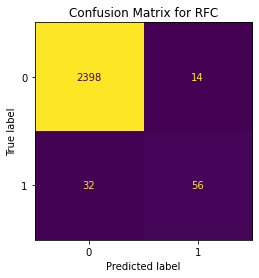

In [6]:
y_pred_RFC = RFC.predict(X_test)

#RFC Confusion Matrix
disp = metrics.plot_confusion_matrix(RFC, X_test, y_test, colorbar=False)
plt.title("Confusion Matrix for RFC")
print(disp.confusion_matrix)

In [7]:
# Model evaluation

print(classification_report(y_test, y_pred_RFC))

# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# rfc_acc_score = -cross_val_score(RFC, X, y, scoring='accuracy', cv=cv)
# rfc_rec_score = cross_val_score(RFC, X, y, scoring='recall', cv=cv)
# print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2412
           1       0.80      0.64      0.71        88

    accuracy                           0.98      2500
   macro avg       0.89      0.82      0.85      2500
weighted avg       0.98      0.98      0.98      2500



You are using pip version 19.0, however version 21.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


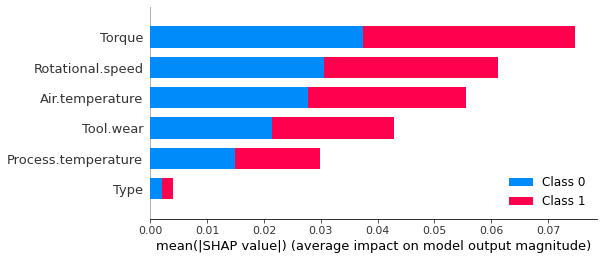

In [69]:
#SHAP Analysis

!pip install shap
import shap

y = df['Machine.failure']

X = df[['Air.temperature', 'Rotational.speed', 'Process.temperature', 'Torque', "Tool.wear", "Type"]]

clf = RandomForestClassifier(n_estimators=500, random_state=23)
clf.fit(X, y)

#Modify color
positive_color = "#ff9898"
negative_color = "#7bb49e"

explainer = shap.Explainer(clf)
shap_values = explainer.shap_values(X[::200])
shap.summary_plot(shap_values, X[::200])

True Class (if 1, Machine Failure, othewise No Machine Failure): 0
Probability that this data point belong to class 0 = 1.00
Base Probability for class 0 = 0.97


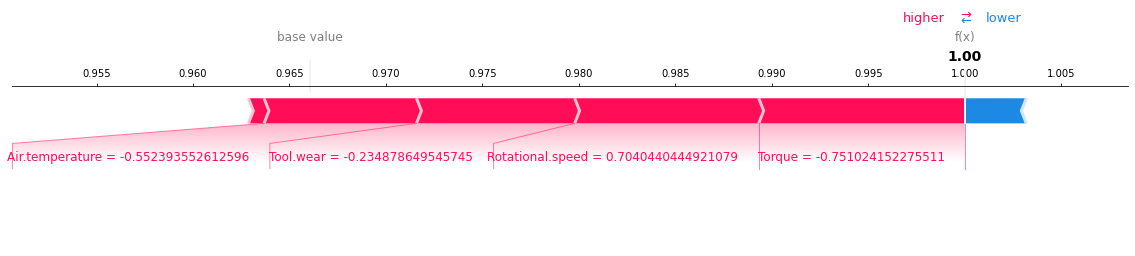

In [58]:
object_i = 33
class_object_i = int(y[::200].iloc[object_i])
print('True Class (if 1, Machine Failure, othewise No Machine Failure):', class_object_i)
print('Probability that this data point belong to class 0 = %0.2f'%(explainer.expected_value[0] + sum(shap_values[0][object_i,:])))
print('Base Probability for class 0 = %0.2f'%(explainer.expected_value[0]))

#Modify color
positive_color = "#ff9898"
negative_color = "#7bb49e"

shap.force_plot(explainer.expected_value[0], 
                shap_values[0][object_i,:], 
                X.iloc[object_i,:], 
                matplotlib=True)

In [48]:
# Assign features
features = df.drop(['UDI', 'Machine.failure'], axis = 1)
feature_list = list(features.columns)
# Get numerical feature importances
importances = list(RFC.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: Rotational.speed     Importance: 0.32
Variable: Air.temperature      Importance: 0.23
Variable: Torque               Importance: 0.16
Variable: Type                 Importance: 0.14
Variable: Process.temperature  Importance: 0.13
Variable: Tool.wear            Importance: 0.02


[None, None, None, None, None, None]

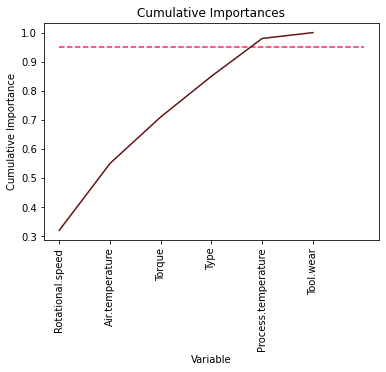

In [67]:
# List features by importance
x_values = list(range(len(importances)))
# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]
# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)
# Make a line graph
plt.plot(x_values, cumulative_importances, '#631314')
# Draw line at 95% of importance retained
plt.hlines(y = 0.95, xmin=0, xmax=len(sorted_importances), color = '#ff2261', linestyles = 'dashed')
# Format x ticks and labels
plt.xticks(x_values, sorted_features, rotation = 'vertical')
# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');